In [ ]:
!pip install openpyxl scikit-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Upload the Excel file
from google.colab import files
uploaded = files.upload()

# Load and combine sheets
file_path = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_path)
sheets = [f"{year}_Detail_Industry" for year in range(2010, 2017)]

df_list = []
for sheet in sheets:
    df = pd.read_excel(file_path, sheet_name=sheet, engine="openpyxl")
    df["Year"] = int(sheet[:4])
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)


Saving SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx to SupplyChainEmissionFactorsforUSIndustriesCommodities (1).xlsx


In [ ]:
df = data[[
    "Industry Name", "Substance", "Unit",
    "DQ ReliabilityScore of Factors without Margins",
    "DQ TemporalCorrelation of Factors without Margins",
    "DQ GeographicalCorrelation of Factors without Margins",
    "DQ TechnologicalCorrelation of Factors without Margins",
    "DQ DataCollection of Factors without Margins",
    "Supply Chain Emission Factors with Margins"
]].dropna()


In [ ]:
X = df.drop(columns=["Supply Chain Emission Factors with Margins"])
y = df["Supply Chain Emission Factors with Margins"]

categorical_features = ["Industry Name", "Substance", "Unit"]
numerical_features = [col for col in X.columns if col not in categorical_features]


In [ ]:
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ("num", StandardScaler(), numerical_features)
])

model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Industry Name', 'Substance',
                                                   'Unit']),
                                                 ('num', StandardScaler(),
                                                  ['DQ ReliabilityScore of '
                                                   'Factors without Margins',
                                                   'DQ TemporalCorrelation of '
                                                   'Factors without Margins',
                                                   'DQ GeographicalCorrelation '
                                                   'of Factors without Margins',
                                                   'DQ '
                                                   'TechnologicalCorrelation '
                                                   'of Factors without Margins',
                                                   'DQ DataCollection of '
                                                   'Factors without '
                                                   'Margins'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

MSE: 0.0005054023797177136
R² Score: 0.9943672665524965


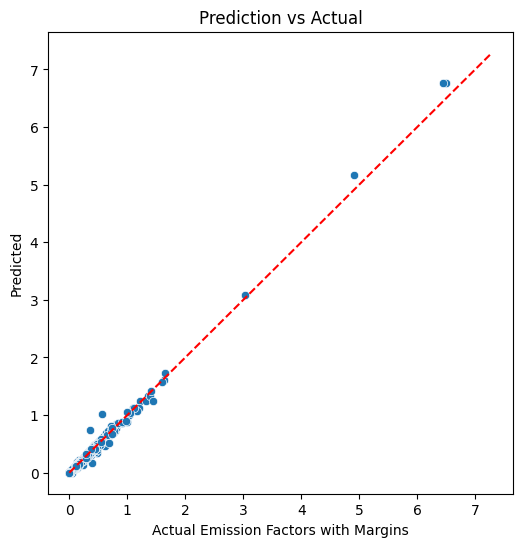

In [ ]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot predictions vs true values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Emission Factors with Margins")
plt.ylabel("Predicted")
plt.title("Prediction vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()
